In [4]:
import pandas as pd

In [5]:
from matplotlib import pyplot as plt

In [6]:
hs_df = pd.read_csv("SomervilleHappinessSurvey.csv",encoding='UTF-16 LE')

In [7]:
hs_df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [18]:
hs_df.tail()

,D,X1,X2,X3,X4,X5,X6
138,0,5,3,3,1,3,5
139,1,5,2,3,4,2,5
140,1,5,3,3,4,4,5
141,0,4,3,3,4,4,5
142,0,5,3,2,5,5,5


In [8]:
hs_df.describe()

,D,X1,X2,X3,X4,X5,X6
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
mode_ratings = hs_df.mode().iloc[:, 1:]

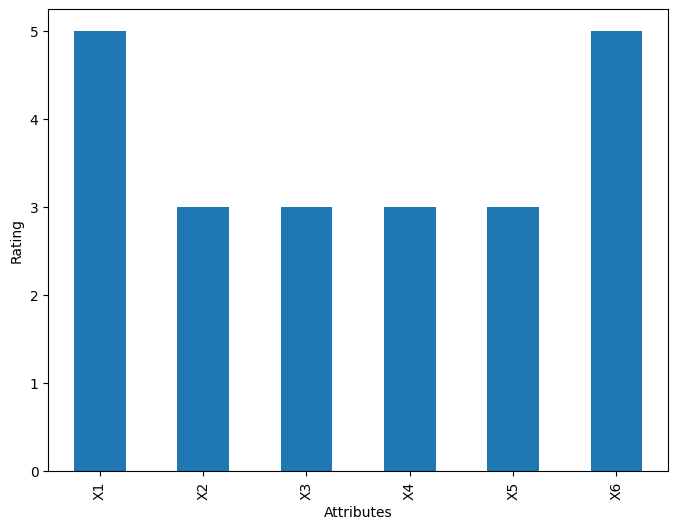

In [10]:
data = {
        'X1': [3, 3, 5, 5, 5],
        'X2': [3, 2, 3, 4, 4],
        'X3': [3, 3, 3, 3, 3],
        'X4': [4, 5, 3, 3, 3],
        'X5': [2, 4, 3, 3, 3],
        'X6': [4, 3, 5, 5, 5]}
df = pd.DataFrame(data)


mode_ratings = df.mode().iloc[0]


mode_ratings.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Attributes')
plt.ylabel('Rating')
plt.show()

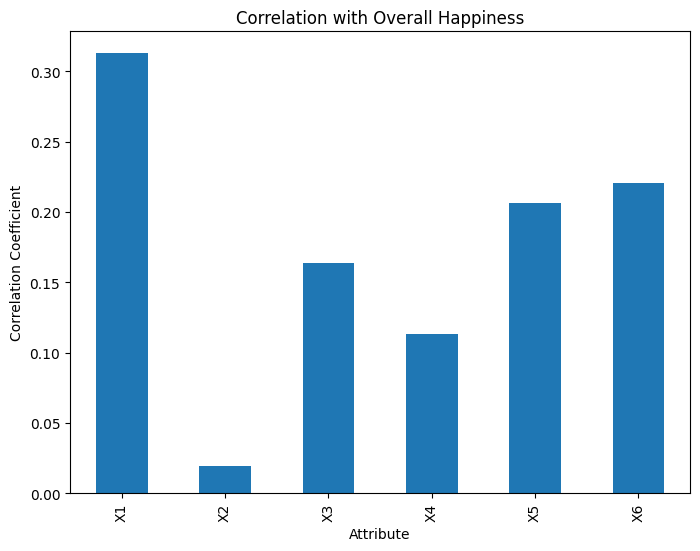

In [11]:
corr_matrix = hs_df.corr()


c_with_d = corr_matrix.iloc[0, 1:]


c_with_d.plot(kind='bar', figsize=(8, 6))
plt.title('Correlation with Overall Happiness')
plt.xlabel('Attribute')
plt.ylabel('Correlation Coefficient')
plt.show()

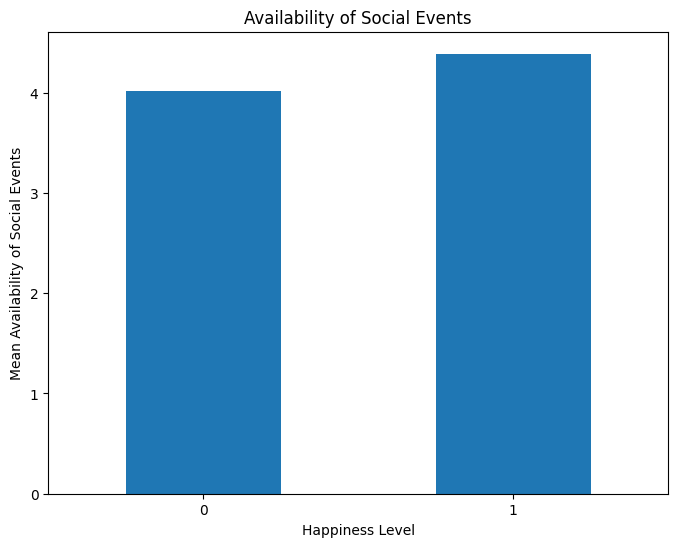

In [12]:

social_by_happiness = hs_df.groupby('D')['X6'].mean()


social_by_happiness.plot(kind='bar', figsize=(8, 6))
plt.title('Availability of Social Events')
plt.xlabel('Happiness Level')
plt.ylabel('Mean Availability of Social Events')
plt.xticks(rotation=0)
plt.show()

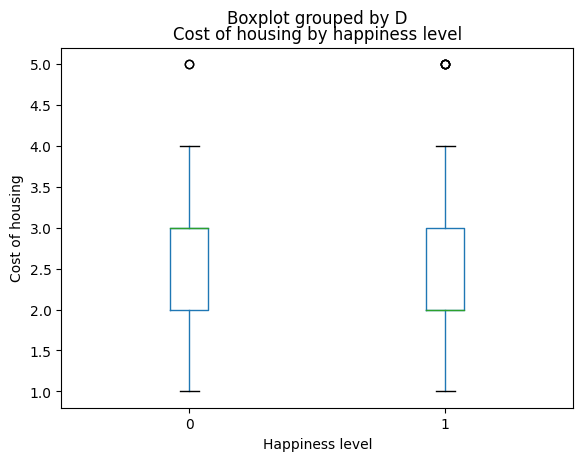

In [13]:

hs_df.boxplot(column='X2', by='D', grid=False)


plt.xlabel('Happiness level')
plt.ylabel('Cost of housing')
plt.title('Cost of housing by happiness level')
plt.show()


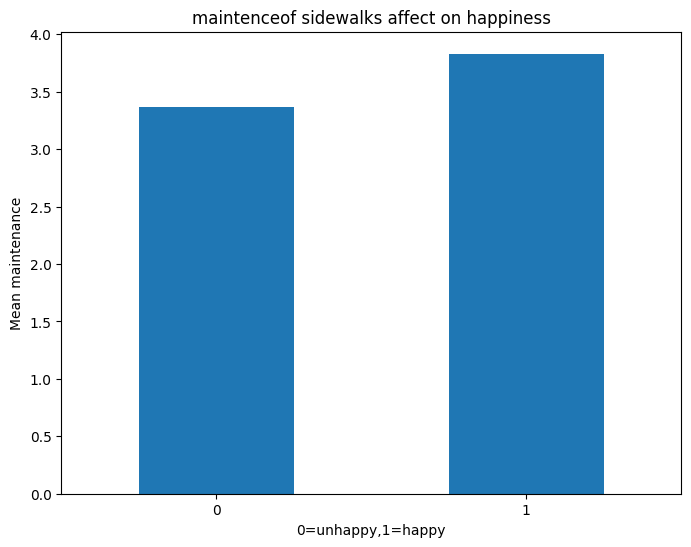

In [14]:

main = hs_df.groupby('D')['X5'].mean()


main.plot(kind='bar', figsize=(8, 6))
plt.title('maintenceof sidewalks affect on happiness')
plt.xlabel('0=unhappy,1=happy')
plt.ylabel('Mean maintenance')
plt.xticks(rotation=0)
plt.show()

In [15]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = hs_df.drop('D', axis=1)
y = hs_df['D']

#80% is used for training and 20% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#to make predictions
y_pred = dt.predict(X_test)

#compares predicted vs actual values
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.5565217391304348


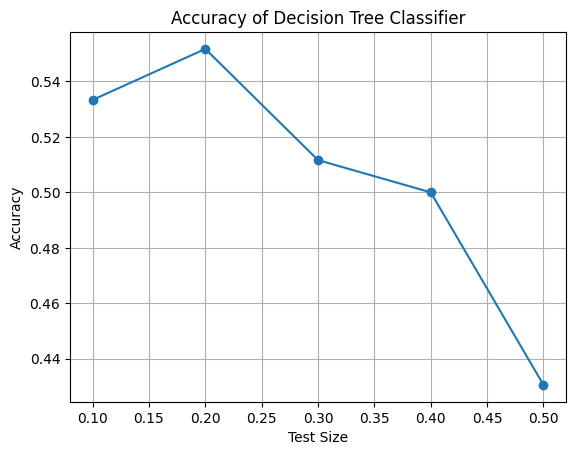

In [16]:
import matplotlib.pyplot as plt

# Calculate accuracy for different test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = []

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies
plt.plot(test_sizes, accuracies, marker='o')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree Classifier')
plt.grid(True)
plt.show()


C:\Users\joses\AppData\Local\Temp\ipykernel_19324\3043049701.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax,bins =30)


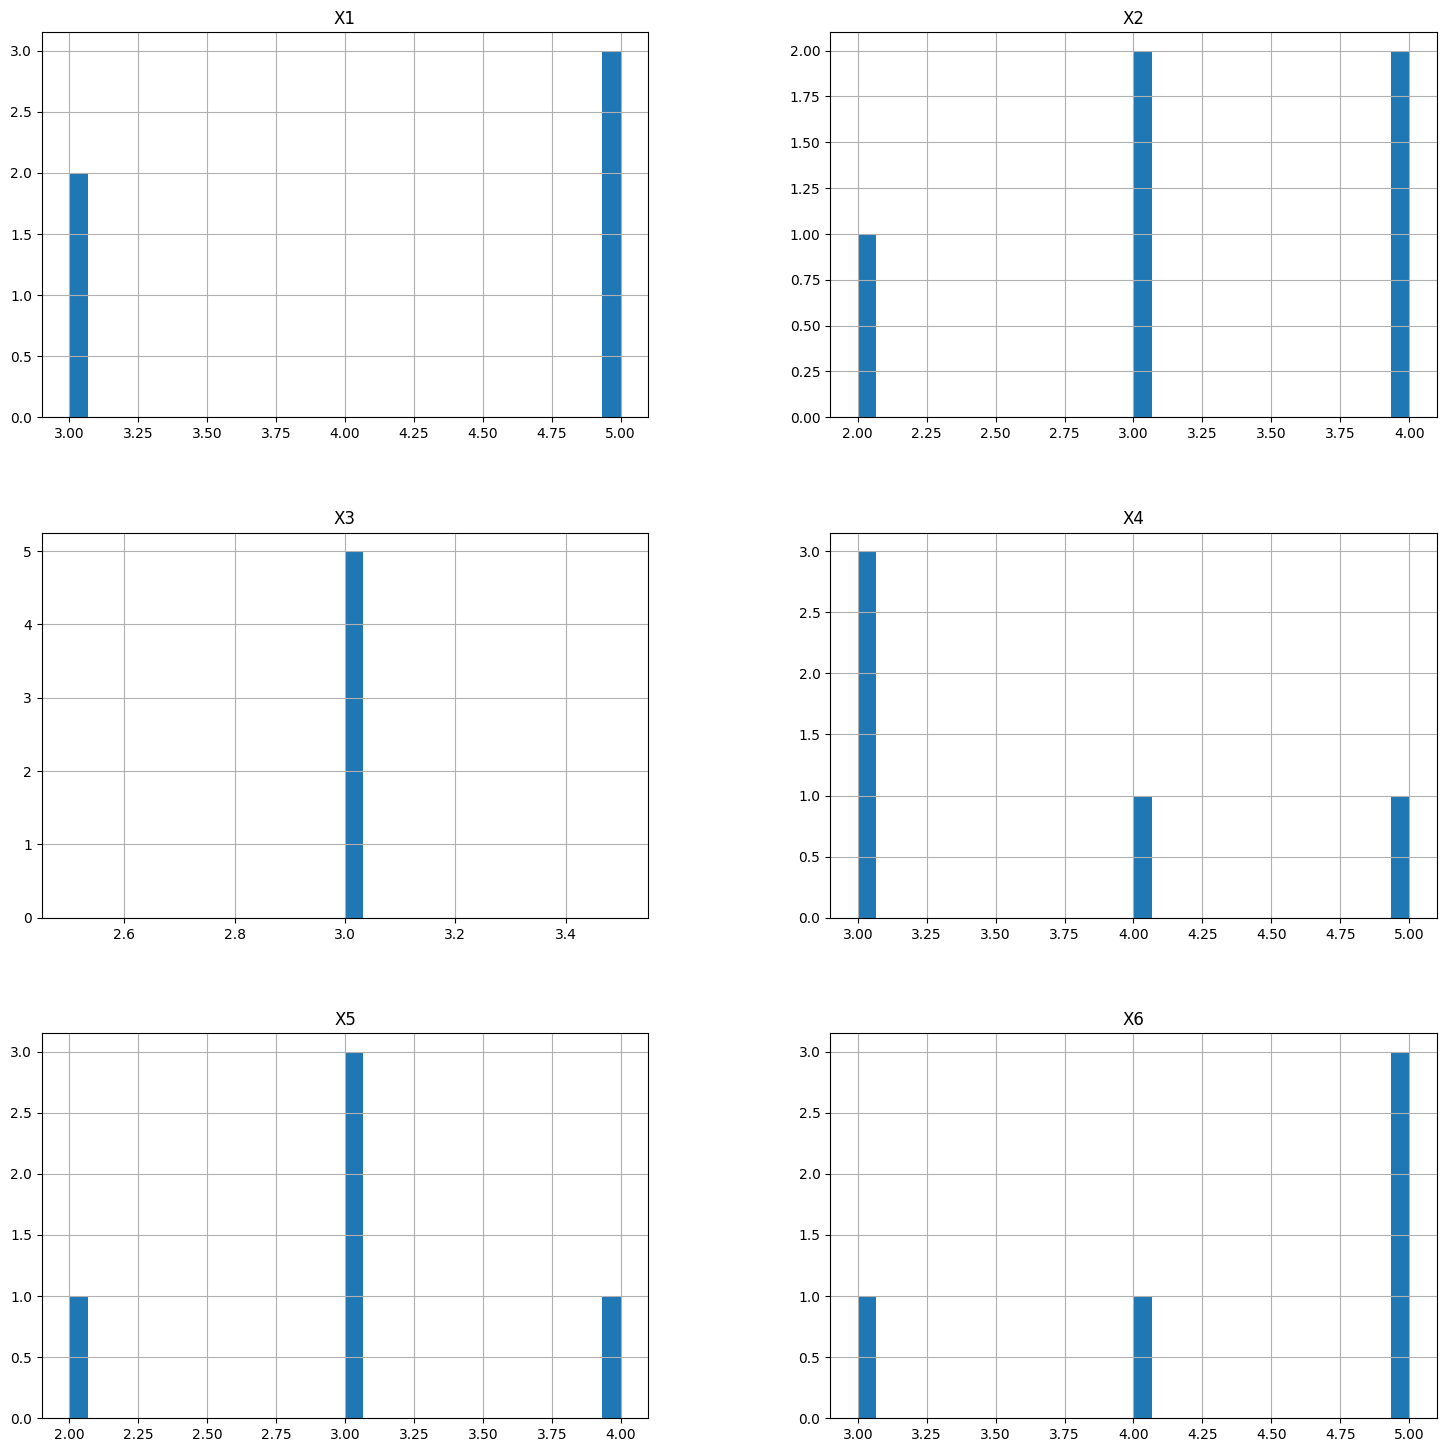

In [17]:
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()
